In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,confusion_matrix
import scipy.stats as stats
from scipy.stats import chi2

# what is my main aim?
The objective is to predict whether a client will subscribe to a term deposit (indicated by the variable "y" as "yes" or "no"). 
Your task is to build a predictive model that determines the likelihood of a client subscribing to a term deposit based on the features provided in the dataset.



In [2]:
#what factors affect a term deposit

In [3]:
df = pd.read_csv('bank-additional-full.csv',delimiter=';')

In [4]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
#finding the data type, column names and total not null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
#Checking for duplicates
df.duplicated().sum()

12

In [7]:
#Removing duplicates
df.drop_duplicates(inplace=True)

In [8]:
#checking for duplicates after removing them
df.duplicated().sum()

0

In [9]:
#checking for missing values
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
#finding a summary statistic of  all categorical variables
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


In [11]:
object_cols = df.select_dtypes(include='object')

In [12]:
#checking for values of categorical variables to ensure consistency
for col in object_cols:
    print(col+ '\n')
    print(df[col].unique())

job

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital

['married' 'single' 'divorced' 'unknown']
education

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default

['no' 'unknown' 'yes']
housing

['no' 'yes' 'unknown']
loan

['no' 'yes' 'unknown']
contact

['telephone' 'cellular']
month

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week

['mon' 'tue' 'wed' 'thu' 'fri']
poutcome

['nonexistent' 'failure' 'success']
y

['no' 'yes']


In [13]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [14]:
numeric_cols = df.select_dtypes(include='number')

In [15]:
list_of_num_cols =numeric_cols.columns.tolist()

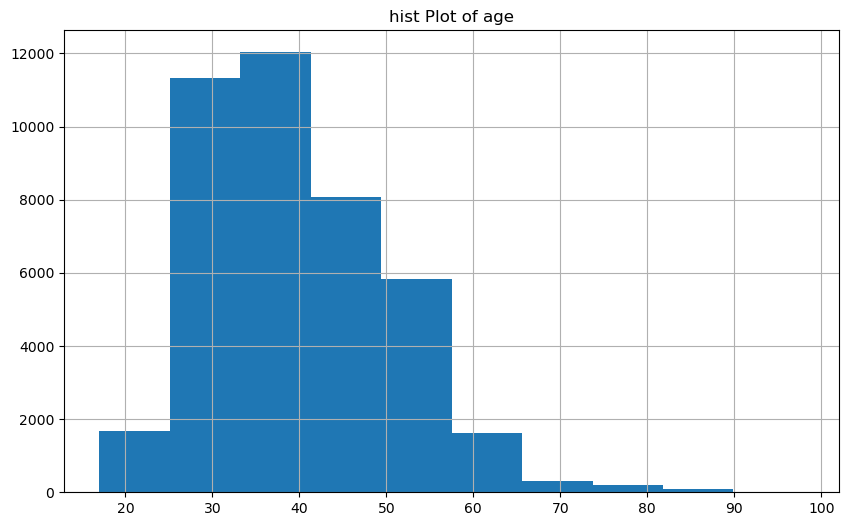

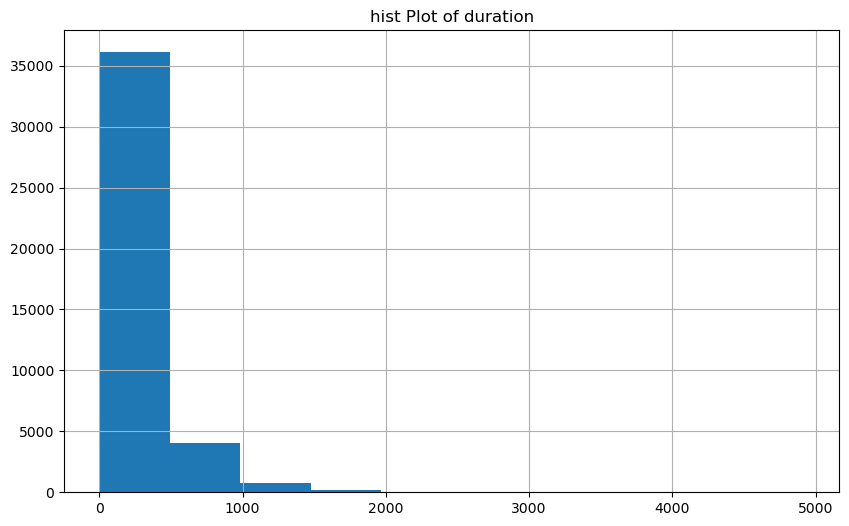

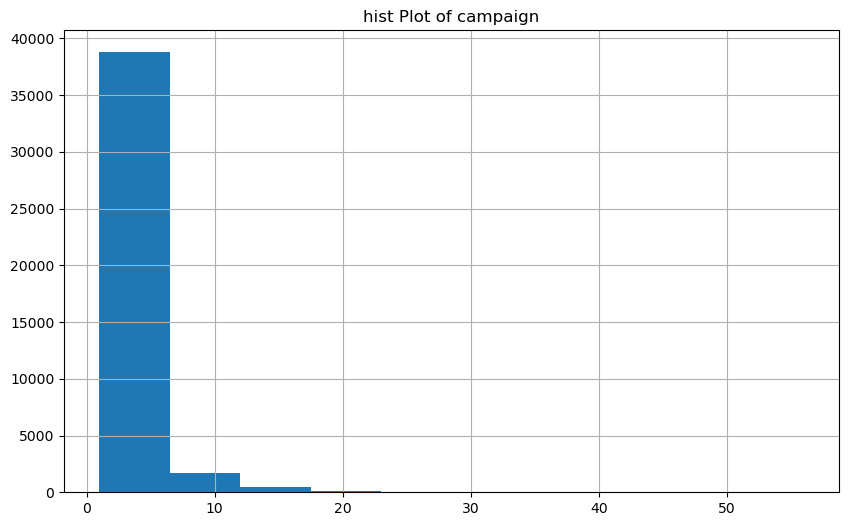

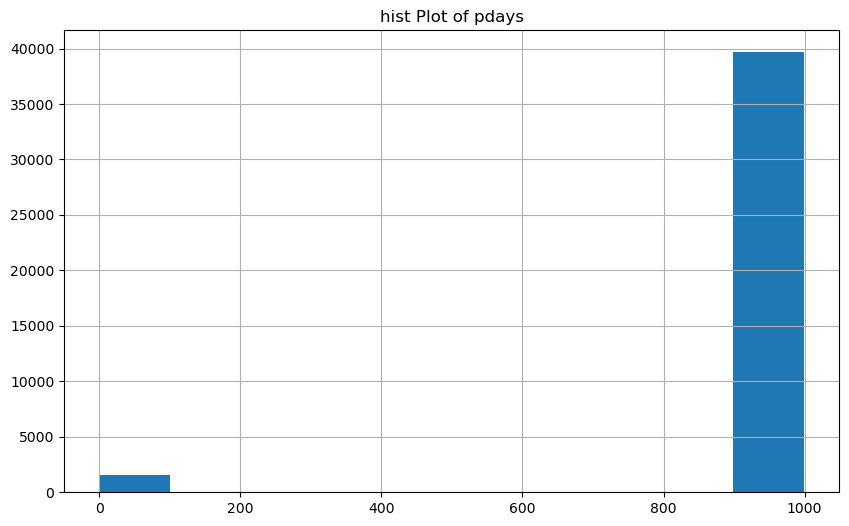

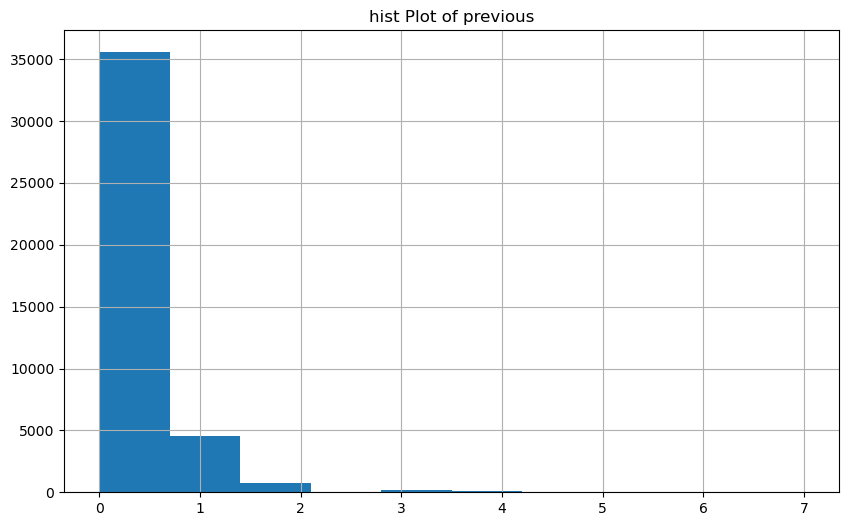

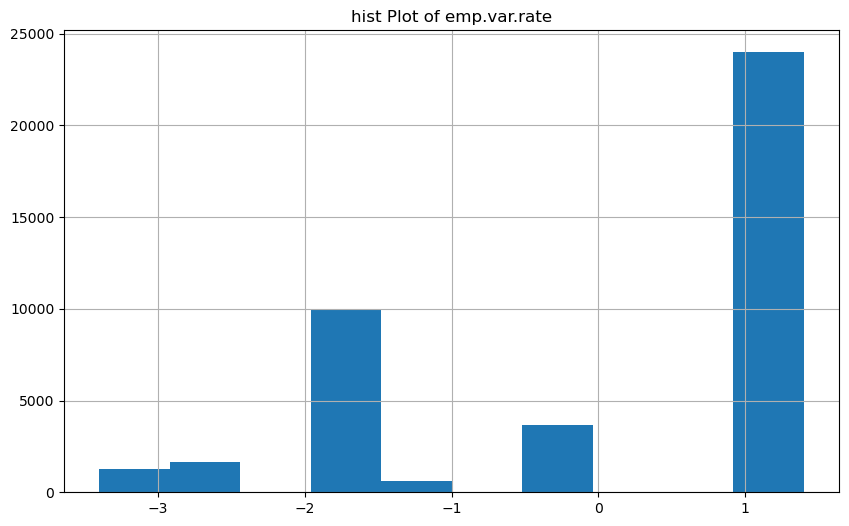

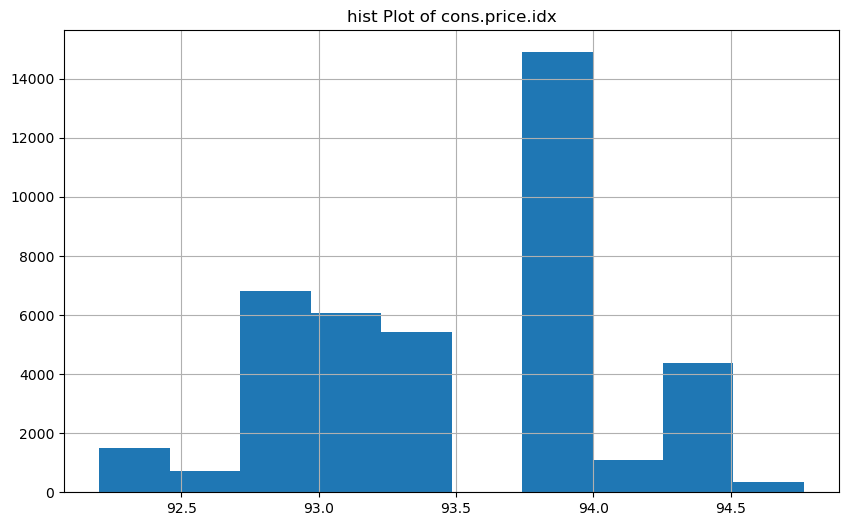

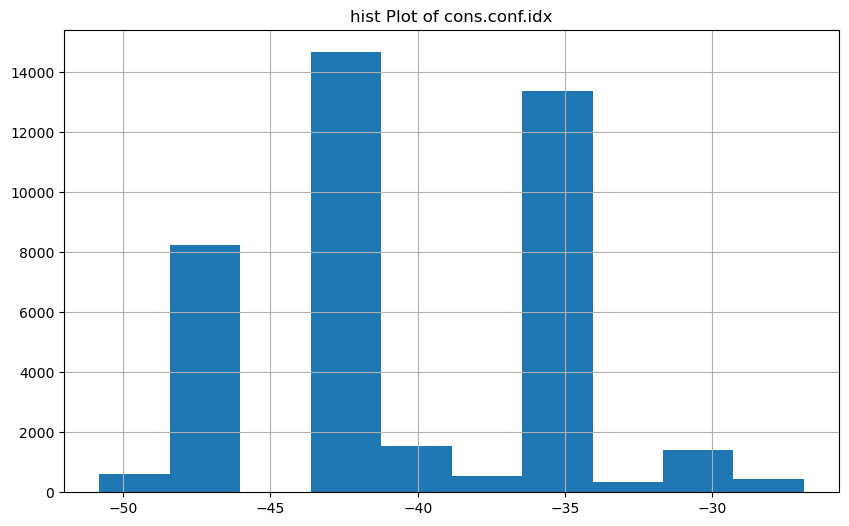

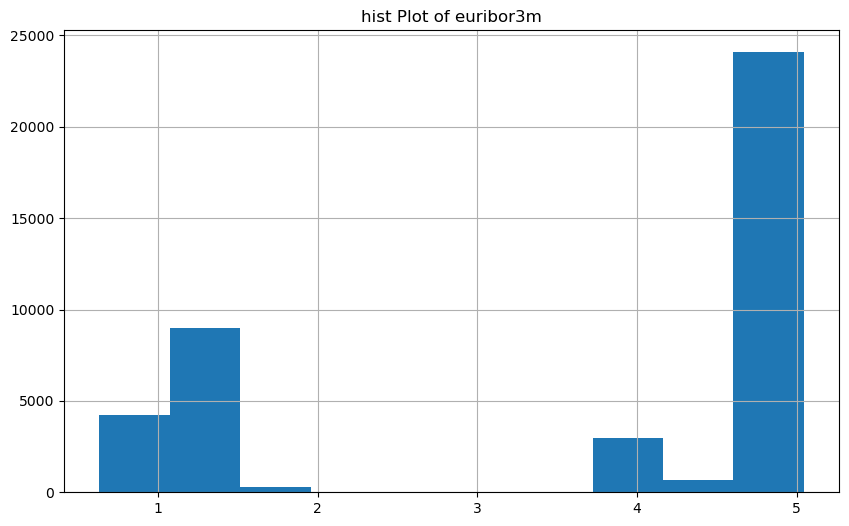

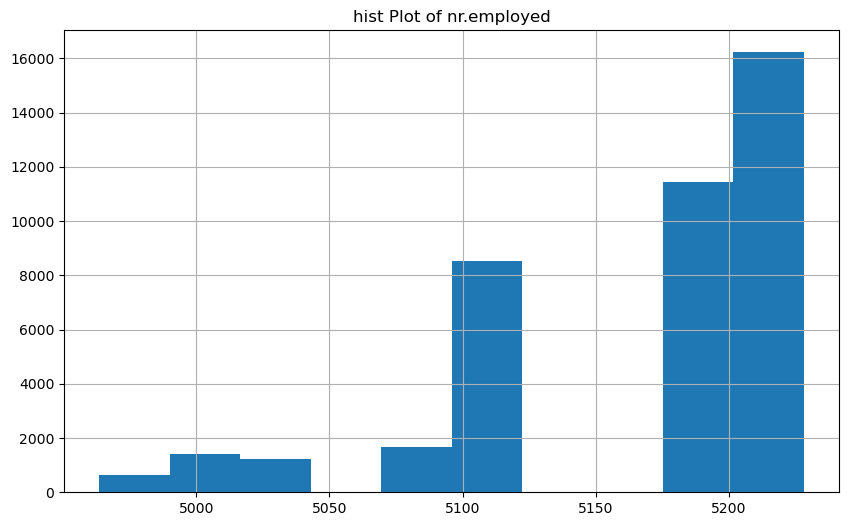

In [16]:
for column in numeric_cols:
    plt.figure(figsize=(10,6))
    plt.title(f'hist Plot of {column}')
    df[column].hist()

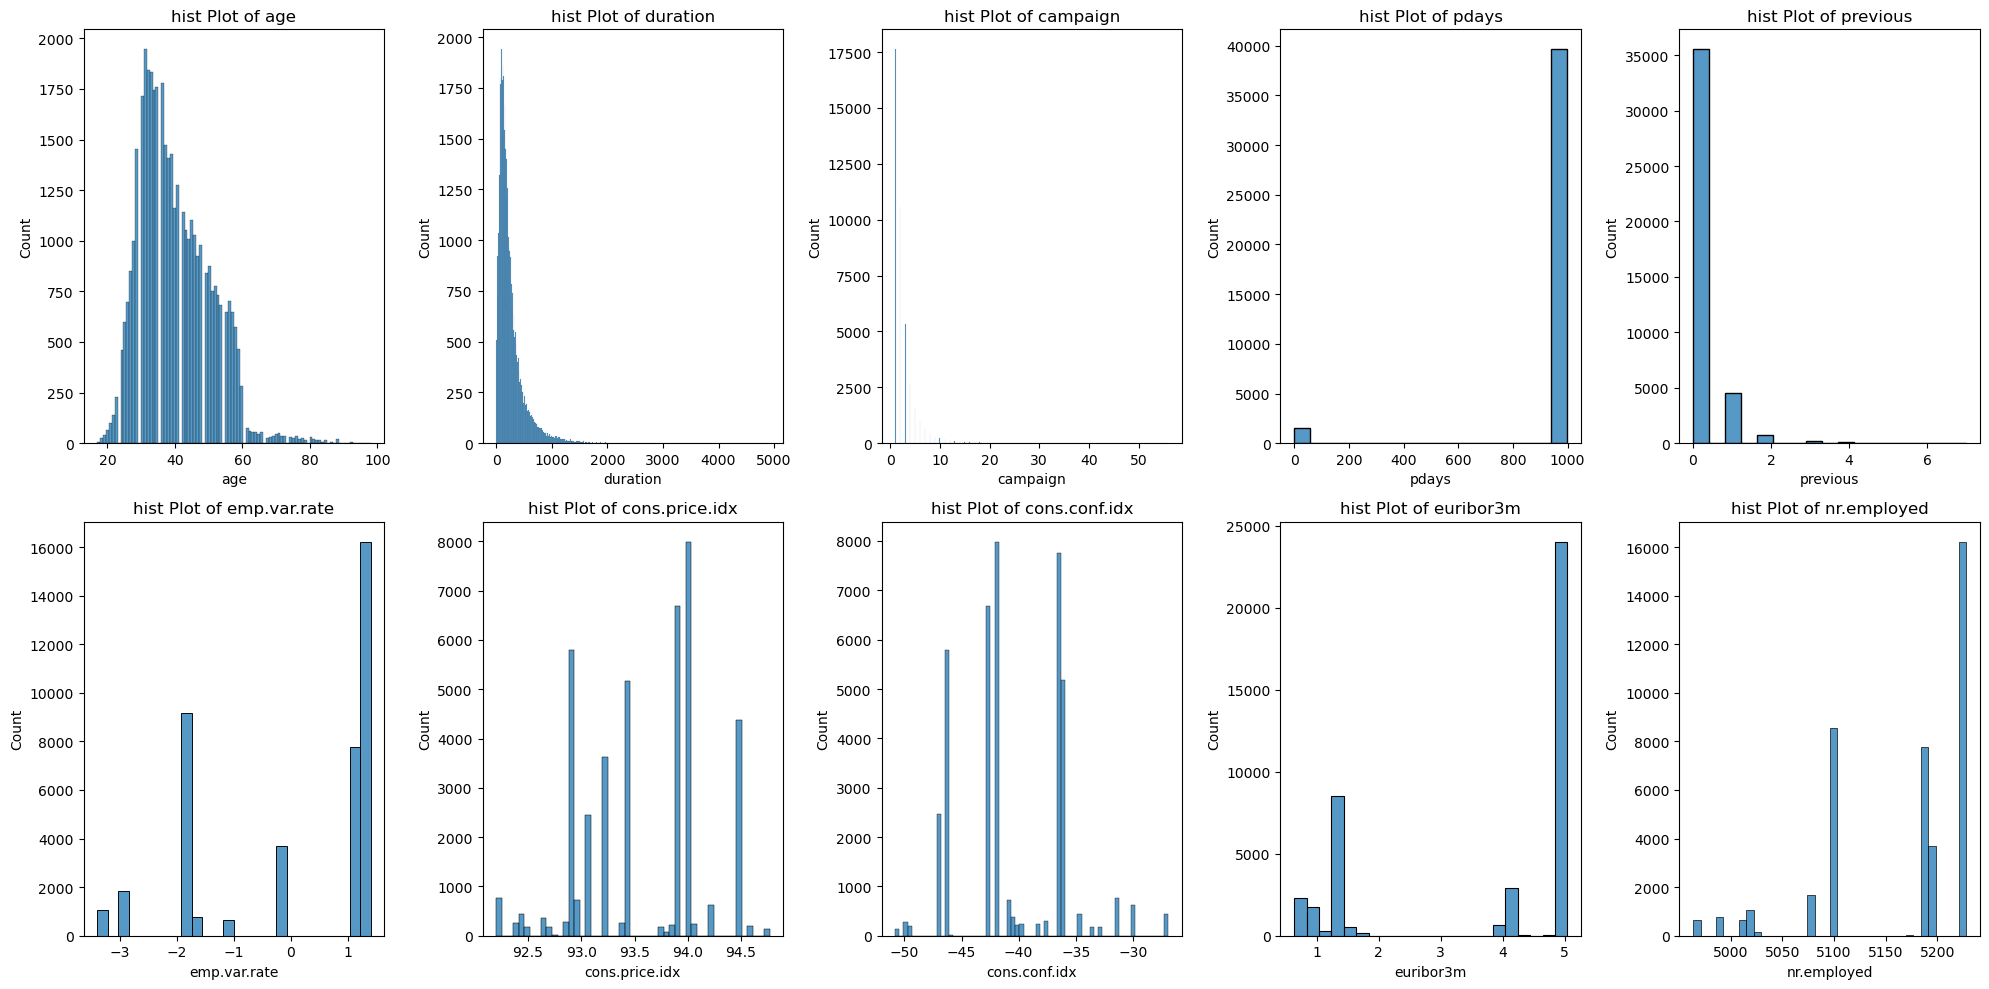

In [17]:
fig,axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()
for i,column in enumerate(list_of_num_cols):
    sns.histplot(data=df,x=column,ax=axes[i])
    
    axes[i].set_title(f'hist Plot of {column}')
plt.tight_layout()
plt.show()

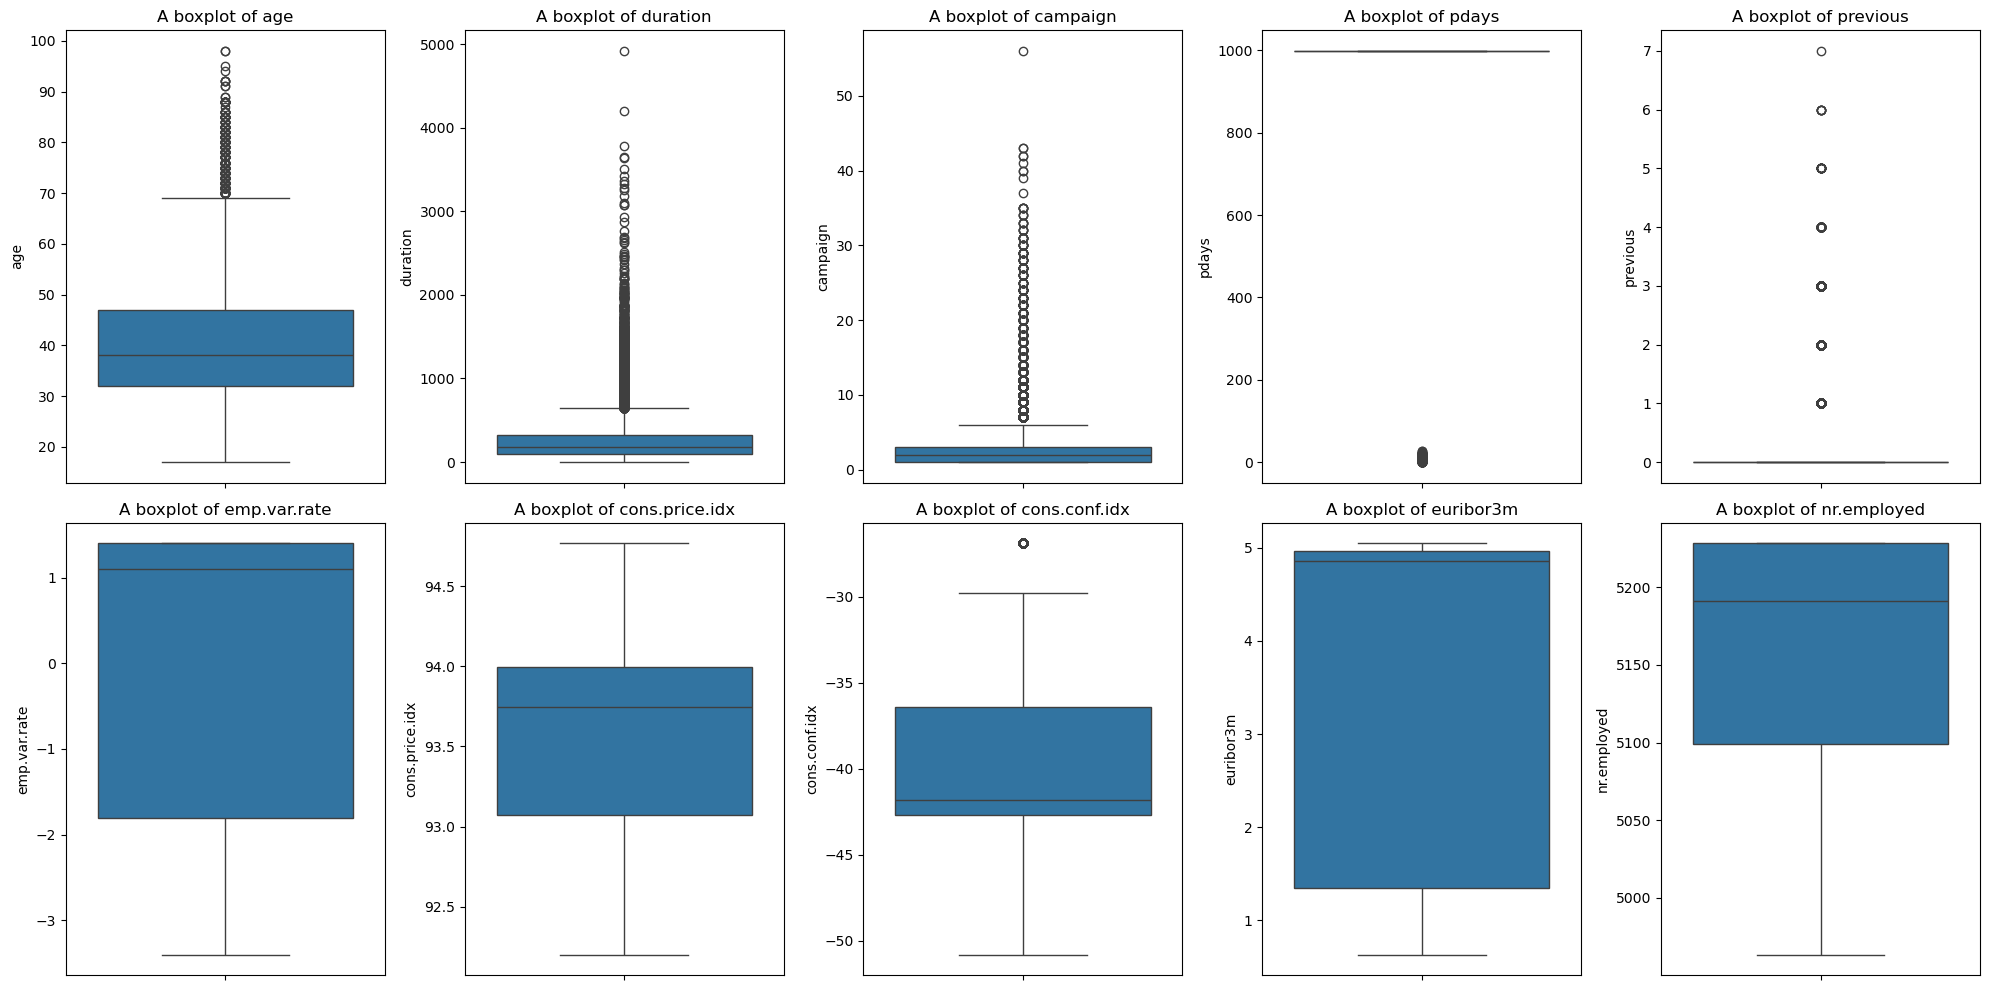

In [18]:
fig, axes = plt.subplots(2,5,figsize=(20,10))
axes = axes.flatten()

for i, column in enumerate(list_of_num_cols):
    sns.boxplot(data=df,y=column,ax =axes[i])
    axes[i].set_title(f'A boxplot of {column}')

plt.tight_layout()
plt.show()

In [19]:
df_crosstab =pd.crosstab(df['job'],df['y']) 

In [20]:
df_crosstab.values

array([[9068, 1351],
       [8615,  638],
       [1332,  124],
       [ 954,  106],
       [2596,  328],
       [1284,  434],
       [1272,  149],
       [3644,  323],
       [ 600,  275],
       [6009,  730],
       [ 870,  144],
       [ 293,   37]])

In [21]:
observed_values= df_crosstab.values

In [27]:
test_dependence = stats.chi2_contingency(observed_values,correction=True)

In [28]:
test_dependence

Chi2ContingencyResult(statistic=961.7438037353177, pvalue=3.268411606616544e-199, dof=11, expected_freq=array([[9245.16716048, 1173.83283952],
       [8210.53188751, 1042.46811249],
       [1291.96308529,  164.03691471],
       [ 940.57752089,  119.42247911],
       [2594.57421799,  329.42578201],
       [1524.44545366,  193.55454634],
       [1260.90628036,  160.09371964],
       [3520.06700505,  446.93299495],
       [ 776.42012337,   98.57987663],
       [5979.7659559 ,  759.2340441 ],
       [ 899.76000583,  114.23999417],
       [ 292.82130367,   37.17869633]]))

In [29]:
expected_value = test_dependence[3]

In [30]:
expected_value

array([[9245.16716048, 1173.83283952],
       [8210.53188751, 1042.46811249],
       [1291.96308529,  164.03691471],
       [ 940.57752089,  119.42247911],
       [2594.57421799,  329.42578201],
       [1524.44545366,  193.55454634],
       [1260.90628036,  160.09371964],
       [3520.06700505,  446.93299495],
       [ 776.42012337,   98.57987663],
       [5979.7659559 ,  759.2340441 ],
       [ 899.76000583,  114.23999417],
       [ 292.82130367,   37.17869633]])

In [34]:
chi_square_statistic = sum([(O-E)**2/E for O,E in zip(observed_values,expected_value)])

In [40]:
chi_square_statistic_value =chi_square_statistic[0]+ chi_square_statistic[1]

In [36]:
alpha =0.05

In [39]:
pvalue=3.268411606616544e-199

In [37]:
critical_value =chi2.ppf(q=1-alpha,df=11)

In [38]:
critical_value

19.675137572682495

In [41]:
if chi_square_statistic_value >critical_value:
    print('Reject the Null hypothesis')
else:
    print('Fail to reject the null hypothesis')

if pvalue <= alpha:
    print('Reject null hypothesis')
else:
    print('fail to reject null hypothesis')

Reject the Null hypothesis
Reject null hypothesis


In [ ]:
# There is an association between the job an individual does and whether he will accept a term deposit or not


In [ ]:
#lets explore distribu